In [5]:
# Importing necessory libraries
import cv2
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
# 1. Helper Functions
def read_and_preprocess(img_path, size=(180, 200)):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img, size)
    return img_resized.flatten()
# by me to(This function reads an image from a given path,convert it to grayscale,resizes it to the desired size])
# in short return 1D array or flattens the matrix into a 1D vector
def construct_data_matrix(folders, size=(180, 200)):
    data = []
    for folder_path in folders:
        image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) and f.endswith('.jpg')]
        for image_file in image_files:
            img_path = os.path.join(folder_path, image_file)
            data.append(read_and_preprocess(img_path, size))
    return np.array(data).T
# construct data matrix id designed to create a data matrix containing grayscale images from specified folders
#Computes the mean of the faces and centers the data by subtracting the mean face from every face in the matrix.
def mean_centering(matrix):
    mean_face = np.mean(matrix, axis=1).reshape(-1, 1)
    return matrix - mean_face, mean_face
# not required if second folder is not used
#Computes the eigenfaces by performing Singular Value Decomposition (SVD) on the centered data matrix.
#Recognizes a face by projecting it onto the eigenface space and
#comparing it with the projected training data. Returns the index of the most similar face from the training data.
def compute_eigenfaces(matrix, num_eigenfaces=None):
    U, S, Vt = np.linalg.svd(matrix, full_matrices=False)
    if num_eigenfaces:
        U = U[:, :num_eigenfaces]
    return U

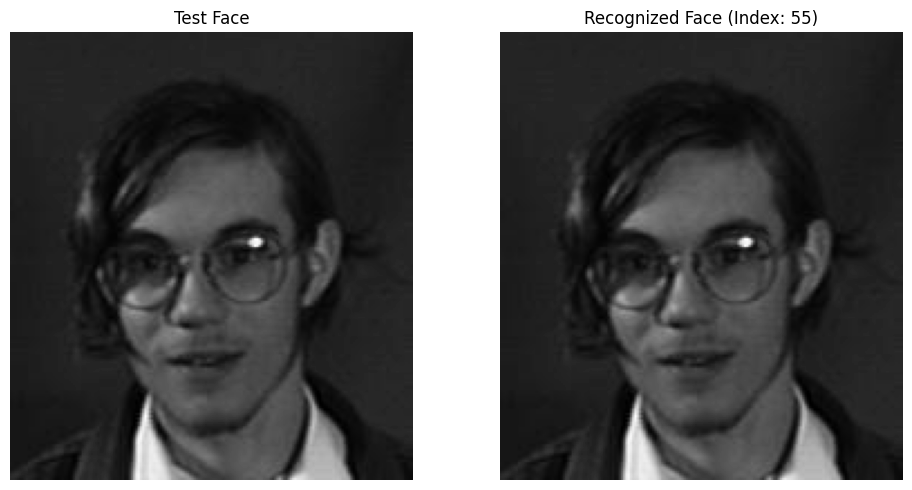

The recognized face has the index: 55
The recognized face is located at: C:\Users\nehal\OneDrive\Desktop\New folder (4)\train80\apdavi.16.jpg


In [13]:
#calculate the Euclidean distances between this projected test face and all the projected training faces. lower value more precise
#.T property of a numpy array is used to transpose the matrix
def recognize_face(new_face, projected_faces, eigenfaces, mean_face, threshold=2200):  # Threshold value can be adjusted
    new_face_centered = new_face - mean_face.ravel()
    new_face_projected = np.dot(eigenfaces.T, new_face_centered).reshape(-1, 1)
    distances = np.linalg.norm(projected_faces - new_face_projected, axis=0)
    
    min_distance = np.min(distances)
    
    if min_distance < threshold:
        return np.argmin(distances)
    else:
        return -1  # indicating face not recognized


def train(folders):
    A = construct_data_matrix(folders)
    A_centered, mean_face = mean_centering(A)
    eigenfaces = compute_eigenfaces(A_centered, num_eigenfaces=20)
    projected_faces = np.dot(eigenfaces.T, A_centered)
    
    model = {
        'eigenfaces': eigenfaces,
        'mean_face': mean_face,
        'projected_faces': projected_faces
    }

    with open('face_model.pkl', 'wb') as file:
        pickle.dump(model, file)
#.......................................For single image use this..................................................
 #3. Testing
def test_face_recognition(img_path, train_folders):
    with open('face_model.pkl', 'rb') as file:
        model = pickle.load(file)

    new_face = read_and_preprocess(img_path)
    recognized_index = recognize_face(new_face, model['projected_faces'], model['eigenfaces'], model['mean_face'])

    if recognized_index == -1:
        print("Face not recognized!")
        return

    test_img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    recognized_img_path = None

    counter = 0
    for folder_path in train_folders:
        image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) and f.endswith('.jpg')]
        if counter + len(image_files) > recognized_index:
            recognized_img_path = os.path.join(folder_path, image_files[recognized_index - counter])
            break
        counter += len(image_files)

    recognized_img = cv2.imread(recognized_img_path, cv2.IMREAD_GRAYSCALE) if recognized_img_path else None

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    axes[0].imshow(test_img, cmap='gray')
    axes[0].set_title("Test Face")
    axes[0].axis('off')

    if recognized_img is not None:
        axes[1].imshow(recognized_img, cmap='gray')
        axes[1].set_title(f"Recognized Face (Index: {recognized_index})")
        axes[1].axis('off')

    plt.tight_layout()
    plt.show()

    print(f"The recognized face has the index: {recognized_index}")
    print(f"The recognized face is located at: {recognized_img_path}")


if __name__ == "__main__":
    train_folders = [
        "C:\\Users\\nehal\\OneDrive\\Desktop\\New folder (4)\\train80"
    ]
    train(train_folders)
    test_img_path = 'apdavi.16.jpg'
    test_face_recognition(test_img_path, train_folders)

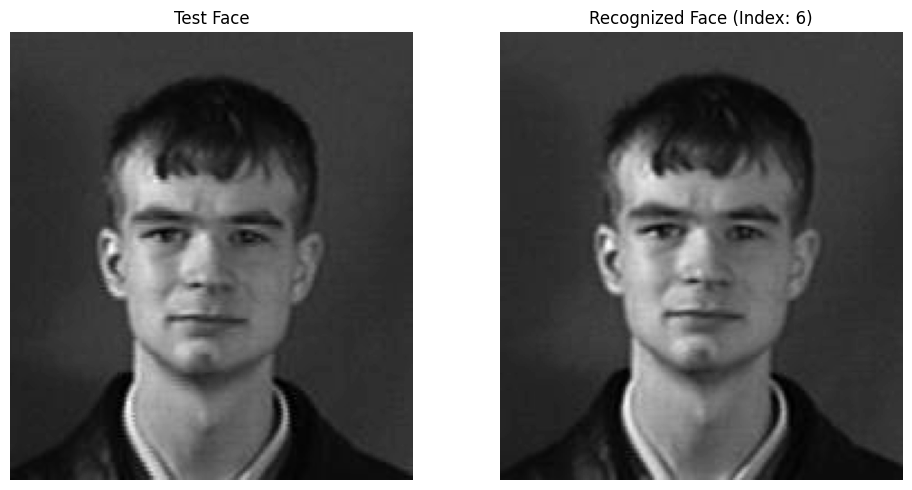

The recognized face has the index: 6
The recognized face is located at: C:\Users\nehal\OneDrive\Desktop\New folder (4)\train80\adhast.15.jpg
--------------------------------------------------


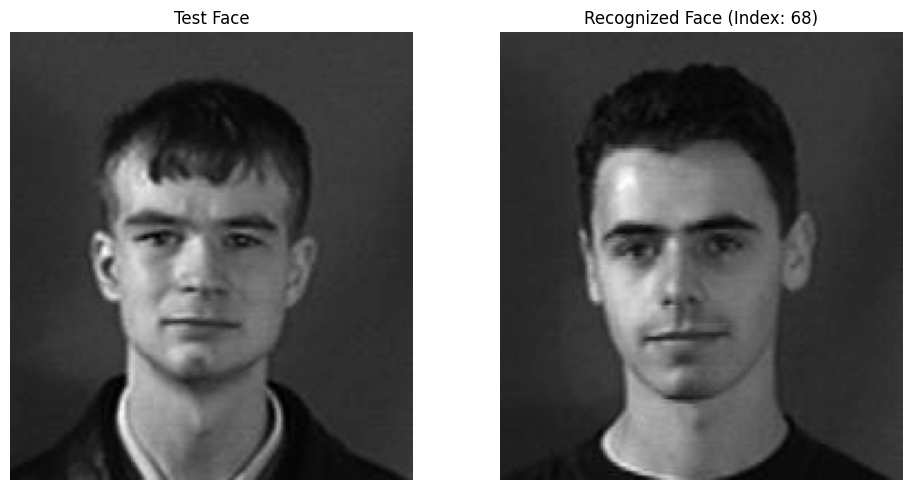

The recognized face has the index: 68
The recognized face is located at: C:\Users\nehal\OneDrive\Desktop\New folder (4)\train80\ardper.13.jpg
--------------------------------------------------
Face in C:\Users\nehal\OneDrive\Desktop\New folder (4)\test2\adhast.3.jpg not recognized!


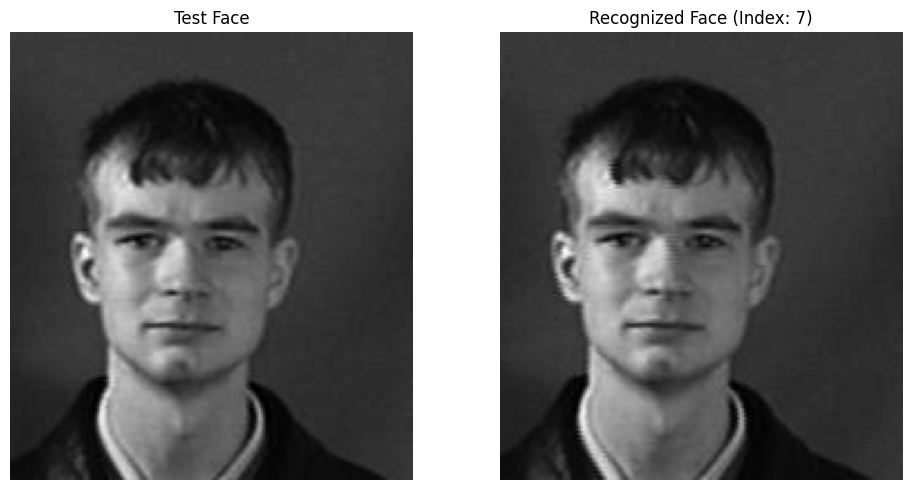

The recognized face has the index: 7
The recognized face is located at: C:\Users\nehal\OneDrive\Desktop\New folder (4)\train80\adhast.16.jpg
--------------------------------------------------


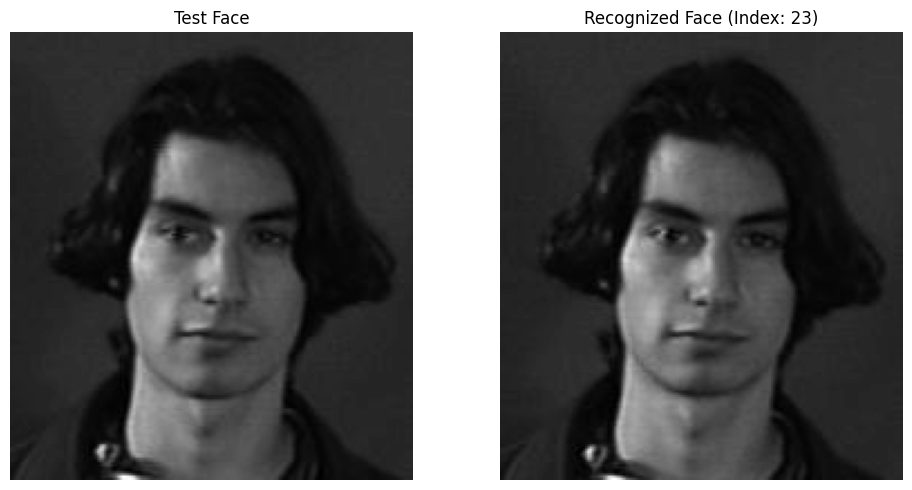

The recognized face has the index: 23
The recognized face is located at: C:\Users\nehal\OneDrive\Desktop\New folder (4)\train80\ajbake.16.jpg
--------------------------------------------------


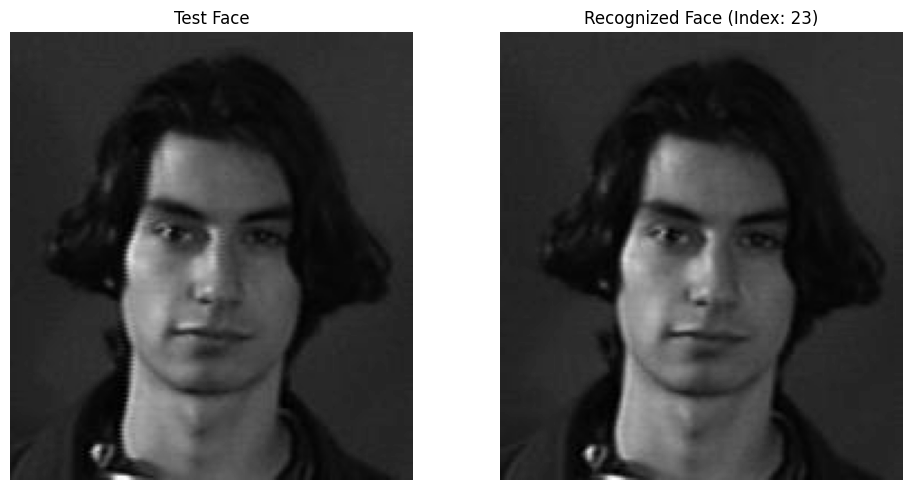

The recognized face has the index: 23
The recognized face is located at: C:\Users\nehal\OneDrive\Desktop\New folder (4)\train80\ajbake.16.jpg
--------------------------------------------------


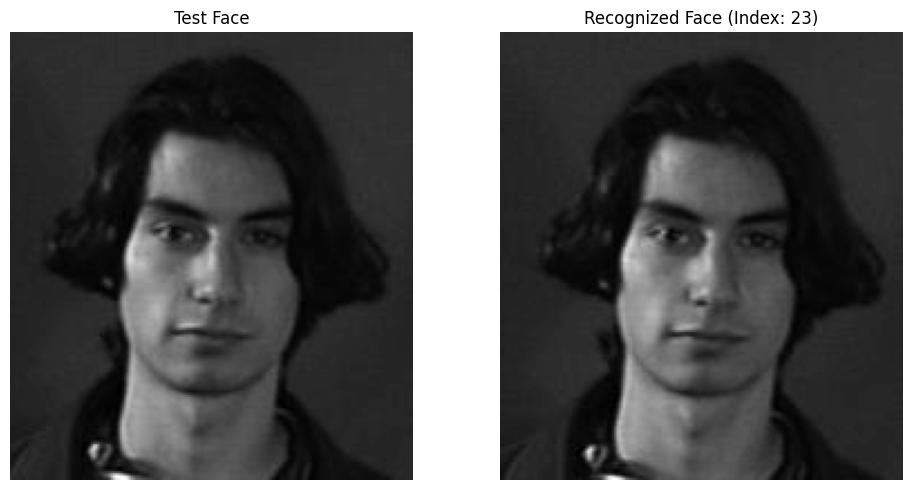

The recognized face has the index: 23
The recognized face is located at: C:\Users\nehal\OneDrive\Desktop\New folder (4)\train80\ajbake.16.jpg
--------------------------------------------------


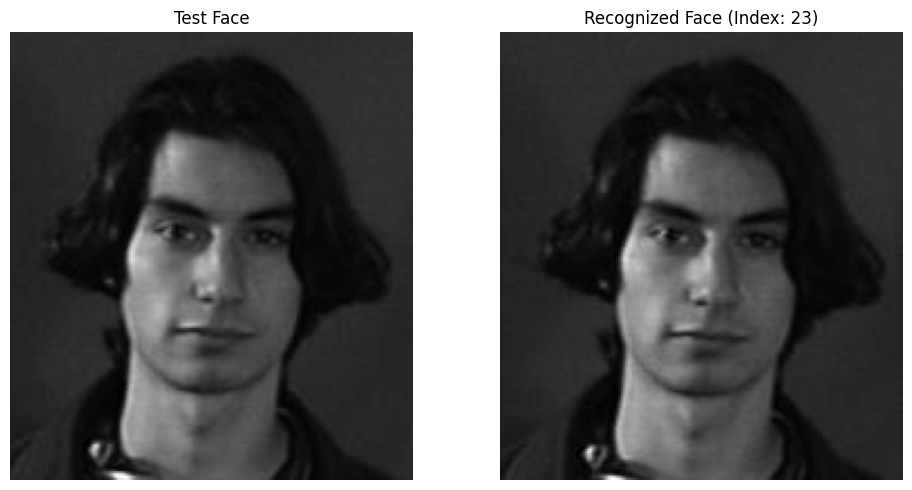

The recognized face has the index: 23
The recognized face is located at: C:\Users\nehal\OneDrive\Desktop\New folder (4)\train80\ajbake.16.jpg
--------------------------------------------------


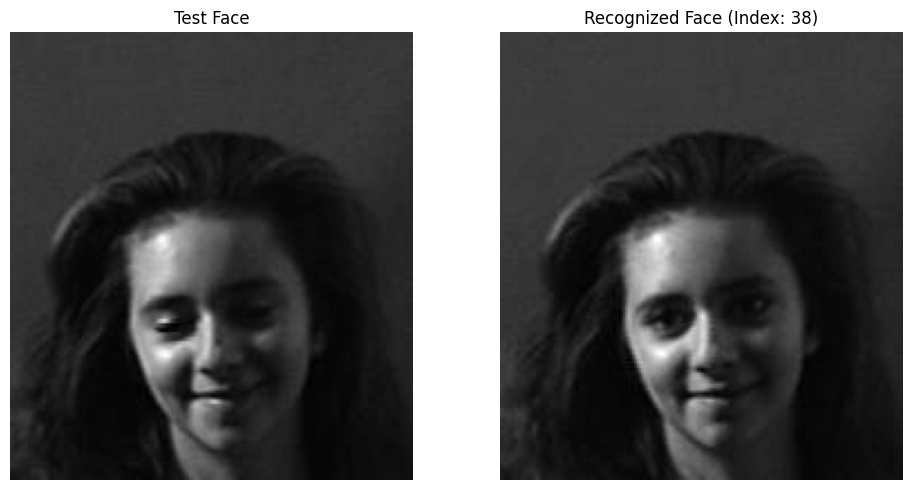

The recognized face has the index: 38
The recognized face is located at: C:\Users\nehal\OneDrive\Desktop\New folder (4)\train80\apapou.15.jpg
--------------------------------------------------
Face in C:\Users\nehal\OneDrive\Desktop\New folder (4)\test2\apapou.2.jpg not recognized!


In [14]:
def test_face_recognitions(test_img_paths, train_folders):
    with open('face_model.pkl', 'rb') as file:
        model = pickle.load(file)

    for test_img_path in test_img_paths:
        new_face = read_and_preprocess(test_img_path)
        recognized_index = recognize_face(new_face, model['projected_faces'], model['eigenfaces'], model['mean_face'])

        if recognized_index == -1:
            print(f"Face in {test_img_path} not recognized!")
            continue

        test_img = cv2.imread(test_img_path, cv2.IMREAD_GRAYSCALE)
        recognized_img_path = None

        counter = 0
        for folder_path in train_folders:
            image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) and f.endswith('.jpg')]
            if counter + len(image_files) > recognized_index:
                recognized_img_path = os.path.join(folder_path, image_files[recognized_index - counter])
                break
            counter += len(image_files)

        recognized_img = cv2.imread(recognized_img_path, cv2.IMREAD_GRAYSCALE) if recognized_img_path else None

        fig, axes = plt.subplots(1, 2, figsize=(10, 5))

        axes[0].imshow(test_img, cmap='gray')
        axes[0].set_title("Test Face")
        axes[0].axis('off')

        if recognized_img is not None:
            axes[1].imshow(recognized_img, cmap='gray')
            axes[1].set_title(f"Recognized Face (Index: {recognized_index})")
            axes[1].axis('off')

        plt.tight_layout()
        plt.show()

        print(f"The recognized face has the index: {recognized_index}")
        print(f"The recognized face is located at: {recognized_img_path}")
        print("-" * 50)


if __name__ == "__main__":
    train_folders = [
        "C:\\Users\\nehal\\OneDrive\\Desktop\\New folder (4)\\train80"
    ]
    train(train_folders)
    
    test_folder = "C:\\Users\\nehal\\OneDrive\\Desktop\\New folder (4)\\test2"
    test_img_paths = [os.path.join(test_folder, f) for f in os.listdir(test_folder) if f.endswith('.jpg')]
    
    test_face_recognitions(test_img_paths[:10], train_folders) # checking first 20

In [ ]:
# 18 detected out of 20  #threshold=2000
# 8 detected out of 10   #threshold=2200